In [107]:
import numpy as np
import pandas as pd
import scipy.stats as st
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt
import random
from datetime import datetime, timedelta
import time
from scipy.stats import shapiro, chi2_contingency, norm

rng = np.random.default_rng()

Напишем функцию для Boostrap

In [102]:
def get_bootstrap(group_A, group_B, func):
    '''На вход подаётся две выборки контрольная group_A и тестовая group_B
    Также передаётся функция для бстрепа'''
    group_A = pd.Series(group_A)
    group_B = pd.Series(group_A)
    sample_size = max([len(group_A), len(group_B)])
    res = []
    for _ in range(5000):
        first_samples = group_A.sample(sample_size, replace = True ).values
        second_samples = group_B.sample(sample_size, replace = True).values
        res.append(func(first_samples - second_samples)) 
    pd_res = pd.DataFrame(res)    
    quants = pd_res.quantile([0.025, 0.975])  
    p_1 = norm.cdf(x = 0, loc = np.mean(res), scale = np.std(res))
    p_2 = norm.cdf(x = 0, loc = -np.mean(res), scale = np.std(res))
    return min(p_1, p_2) * 2

## Экспоненциальное распределение

Средние значения групп: 1.022213515638333, 0.9871901768848939
Медианы групп: 0.6751465612540315, 0.7053687818515059


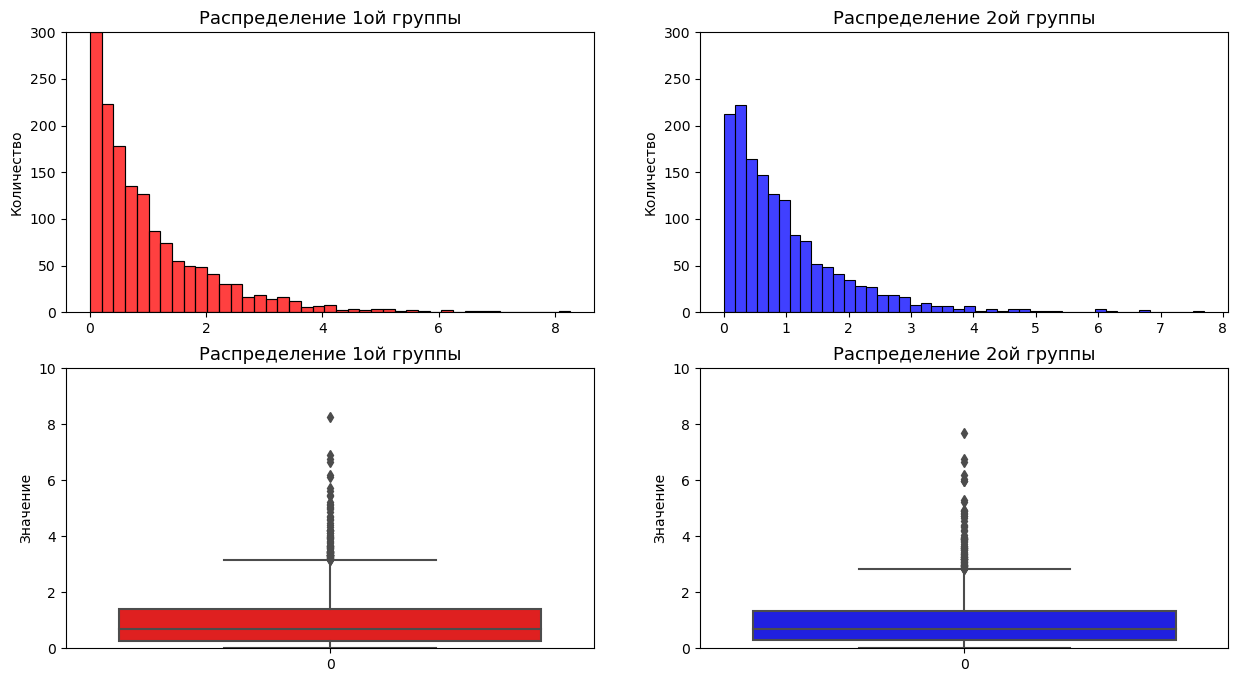

T-test    0.347312
Name: p-val, dtype: float64

In [2]:
exponential_1 = rng.exponential(scale=1.0, size=1500)
exponential_2 = rng.exponential(scale=1.0, size=1500)

exp_mean = (exponential_1.mean(), exponential_2.mean())
exp_median = np.median(exponential_1), np.median(exponential_2)

print(f'Средние значения групп: {exp_mean[0]}, {exp_mean[1]}')
print(f'Медианы групп: {exp_median[0]}, {exp_median[1]}')

r_color = 'SeaGreen'

fig, axs = plt.subplots(2, 2, figsize=(15, 8))

sns.histplot(data=exponential_1, ax=axs[0][0], color='red')
axs[0][0].set_title("Распределение 1ой группы", fontsize=13)
axs[0][0].set_ylabel('Количество')
axs[0][0].set_ylim([0, 300])

sns.histplot(data=exponential_2, ax=axs[0][1], color='blue')
axs[0][1].set_title("Распределение 2ой группы", fontsize=13)
axs[0][1].set_ylabel('Количество')
axs[0][1].set_ylim([0, 300])

sns.boxplot(data=exponential_1, ax=axs[1][0], color='red')
axs[1][0].set_title("Распределение 1ой группы", fontsize=13)
axs[1][0].set_ylabel('Значение')
axs[1][0].set_ylim([0, 10])

sns.boxplot(data=exponential_2, ax=axs[1][1], color='blue')
axs[1][1].set_title("Распределение 2ой группы", fontsize=13)
axs[1][1].set_ylabel('Значение')
axs[1][1].set_ylim([0, 10])

plt.show()

pg.ttest(exponential_1, exponential_2)['p-val']

In [3]:
list_ttest = []

exponential_1 = rng.exponential(scale=1.0, size=10000)
exponential_2 = rng.exponential(scale=1.0, size=10000)

st.brunnermunzel(exponential_1, exponential_2).pvalue

0.4550225135891661

In [90]:
exponential_1

array([0.45607048, 4.55456556, 0.38052472, ..., 0.4259339 , 3.73749786,
       0.55500507])

In [141]:
%%time
time_start = datetime.now()
delta_time = timedelta(seconds=30)
list_ttest = ('t-критерий Стьюдента', [])  #  Список p-value t-теста
list_ttest_ind = ('t-критерий усечённых средних', [])  #  Список p-value t-теста усечённых средних
list_median_test = ('t-критерий сравнение медиан Муда', []) #  Список p-value сравнение медиан Муда
list_mwu = ('U-критерий Манна — Уитни', [])  #  Список p-value критерия Манна-Уитни
list_bm = ('Бруннер-манцель', [])  # Список p-value Бруннер-манцель
list_boostrap_mean = ('Boostrap средних', [])  # Список бустрепа по средним
list_boostrap_median = ('Boostrap медиан', [])  # Список бустрепа по медианам

n = 10000
for i in range(n):
    exponential_1 = rng.exponential(scale=1.0, size=1500)
    exponential_2 = rng.exponential(scale=1.0, size=1500)
    
    pvalue_ttest = float(pg.ttest(exponential_1, exponential_2)['p-val'])
    pvalue_ttest_ind = float(st.ttest_ind(exponential_1, exponential_2, trim=0.2, equal_var=False).pvalue)
    pvalue_median_test = st.median_test(exponential_1, exponential_2)[2]
    pvalue_mwu = float(pg.mwu(exponential_1, exponential_2)['p-val'])
    pvalue_bm = float(st.brunnermunzel(exponential_1, exponential_2).pvalue)
    pvalue_boostrap_mean = get_bootstrap(exponential_1, exponential_2, np.mean)
    pvalue_boostrap_median = get_bootstrap(exponential_1, exponential_2, np.median)
    
    list_ttest[1].append(pvalue_ttest)
    list_ttest_ind[1].append(pvalue_ttest_ind)
    list_median_test[1].append(pvalue_median_test)
    list_mwu[1].append(pvalue_mwu)
    list_bm[1].append(pvalue_bm)
    list_boostrap_mean[1].append(pvalue_boostrap_mean)
    list_boostrap_median[1].append(pvalue_boostrap_median)
    if i % 100 == 0 and i != 0: 
         print('▮', end='')
    step_time = datetime.now()
    if step_time - time_start > delta_time:
        time_start = step_time
        print(n - i)

9988
9974
9960
9946
9932
9918
9904
▮9890
9876
9862
9848
9834
9820
9806
▮9792
9778
9764
9750
9736
9722
9708
▮9694
9680
9666
9652
9638
9624
9610
▮9596
9582
9568
9554
9540
9526
9512
▮9498
9484
9470
9456
9442
9428
9414
▮9400
9386
9372
9358
9344
9330
9316
9302
▮9288
9274
9260
9246
9232
9218
9204
▮9190
9176
9162
9148
9134
9120
9106
▮9092
9078
9064
9050
9036
9022
9008
▮8994
8980
8966
8952
8938
8924
8910
▮8897
8883
8869
8855
8841
8827
8813
▮8799
8785
8771
8757
8743
8729
8715
8701
▮8687
8673
8659
8645
8631
8617
8603
▮8589
8575
8561
8547
8533
8519
8505
▮8491
8477
8463
8449
8435
8421
8407
▮8393
8379
8365
8351
8337
8323
8309
▮8295
8281
8267
8253
8239
8226
8213
8201
▮8187
8173
8159
8146
8133
8120
8108
▮8095
8083
8071
8058
8045
8032
8019
8006
▮7993
7980
7967
7954
7941
7928
7915
7902
▮7889
7876
7863
7850
7837
7824
7811
▮7798
7785
7772
7759
7746
7733
7720
7707
▮7694
7681
7668
7655
7642
7629
7616
7603
▮7590
7577
7564
7551
7538
7525
7512
▮7499
7486
7473
7460
7447
7434
7421
7408
▮7395
7382
7369
7356
7343

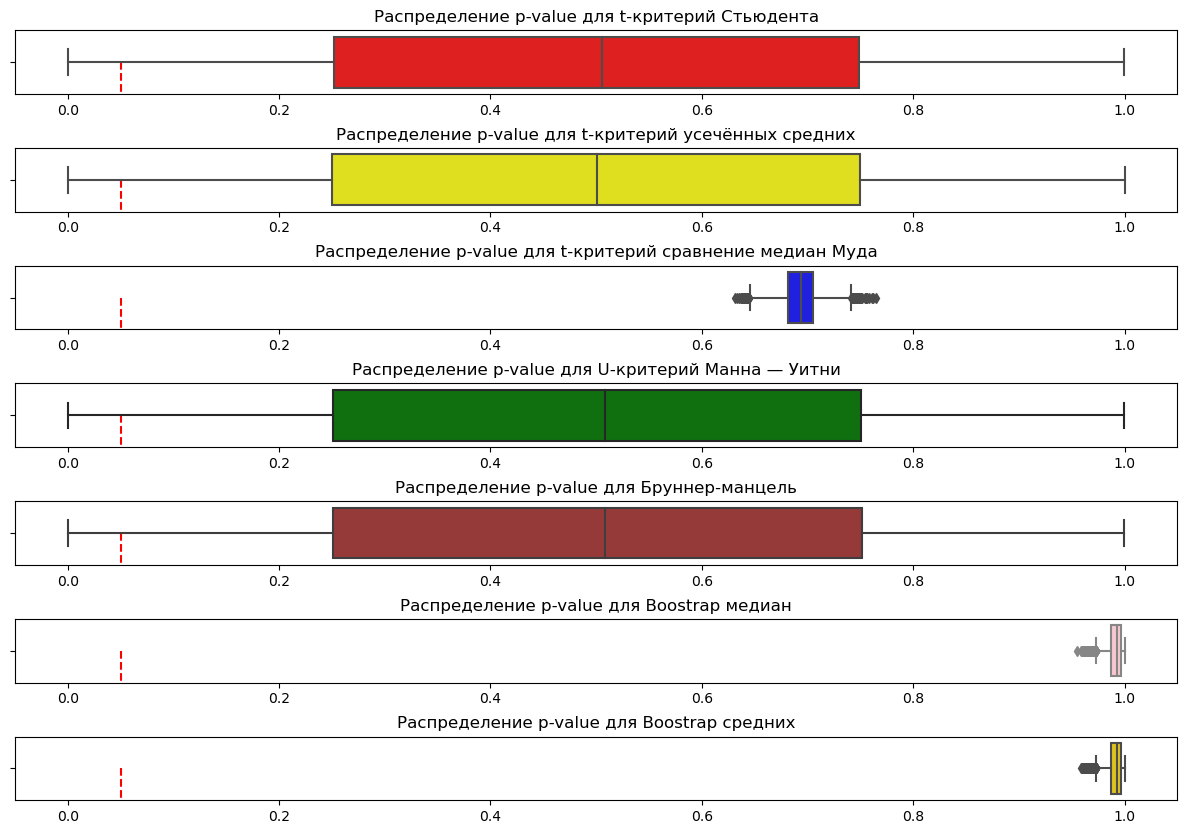

In [143]:
fig, axes = plt.subplots(nrows=7, sharex=False, sharey=True, figsize=(15, 10))
plt.subplots_adjust(hspace=0.85)
colors = ('red', 'yellow', 'blue', 'green', 'brown', 'pink', 'gold')
for method in enumerate([list_ttest, list_ttest_ind, list_median_test, list_mwu, list_bm, list_boostrap_median, list_boostrap_mean]):
    index = method[0]
    axes[index].vlines(x = 0.05,ymin=0,ymax=400,linestyle='--', color='red')
    axes[index].vlines(x = 0,ymin=0,ymax=400,linestyle='--', color='white')
    axes[index].vlines(x = 1,ymin=0,ymax=400,linestyle='--', color='white')
    sns.boxplot(x=method[1][1], ax=axes[method[0]], color=colors[index])
    axes[index].set_title(f'Распределение p-value для {method[1][0]}')

In [144]:
%%time
time_start = datetime.now()
delta_time = timedelta(seconds=30)
list_ttest = ('t-критерий Стьюдента', [])  #  Список p-value t-теста
list_ttest_ind = ('t-критерий усечённых средних', [])  #  Список p-value t-теста усечённых средних
list_median_test = ('t-критерий сравнение медиан Муда', []) #  Список p-value сравнение медиан Муда
list_mwu = ('U-критерий Манна — Уитни', [])  #  Список p-value критерия Манна-Уитни
list_bm = ('Бруннер-манцель', [])  # Список p-value Бруннер-манцель
list_boostrap_mean = ('Boostrap средних', [])  # Список бустрепа по средним
list_boostrap_median = ('Boostrap медиан', [])  # Список бустрепа по медианам

n = 10000
for i in range(n):
    exponential_1 = rng.exponential(scale=1.0, size=1500)
    exponential_2 = rng.exponential(scale=1.1, size=1500)
    
    pvalue_ttest = float(pg.ttest(exponential_1, exponential_2)['p-val'])
    pvalue_ttest_ind = float(st.ttest_ind(exponential_1, exponential_2, trim=0.2, equal_var=False).pvalue)
    pvalue_median_test = st.median_test(exponential_1, exponential_2)[2]
    pvalue_mwu = float(pg.mwu(exponential_1, exponential_2)['p-val'])
    pvalue_bm = float(st.brunnermunzel(exponential_1, exponential_2).pvalue)
    pvalue_boostrap_mean = get_bootstrap(exponential_1, exponential_2, np.mean)
    pvalue_boostrap_median = get_bootstrap(exponential_1, exponential_2, np.median)
    
    list_ttest[1].append(pvalue_ttest)
    list_ttest_ind[1].append(pvalue_ttest_ind)
    list_median_test[1].append(pvalue_median_test)
    list_mwu[1].append(pvalue_mwu)
    list_bm[1].append(pvalue_bm)
    list_boostrap_mean[1].append(pvalue_boostrap_mean)
    list_boostrap_median[1].append(pvalue_boostrap_median)
    if i % 100 == 0 and i != 0: 
         print('▮', end='')
    step_time = datetime.now()
    if step_time - time_start > delta_time:
        time_start = step_time
        print(n - i, end='')

9987997399599945993199179903▮9889987598619847983398199805▮9791977797639749973597219707▮9693967996659651963796239609▮9595958195679553953995259511▮9497948394699455944194279413▮93999385937193579343932993159301▮9287927392599245923192179203▮9189917591619147913391199105▮9091907790639049903590219007▮8993897989658951893789238909▮8895888188678853883988258811▮8797878387698755874187278713▮87008687867386598645863186178603▮8589857585618547853385198505▮8491847784638449843584218407▮8393837983658351833783238309▮8295828182678253823982258211▮81978183816981558141812781158102▮8089807580628049803680238010▮7996798279687954794079277913▮78997885787178577843782978157801▮7787777377597745773177177703▮7690767676627649763676247611▮75987585757275607547753575227509▮7495748174677453743974257411▮7397738373697355734173277313▮72997285727172577243722972157201▮7187717371597145713171177103▮7089707570617047703370197005▮6991697769636949693569216907▮6893687968656851683768236809▮6795678167676753673967256711▮6697668366696655664

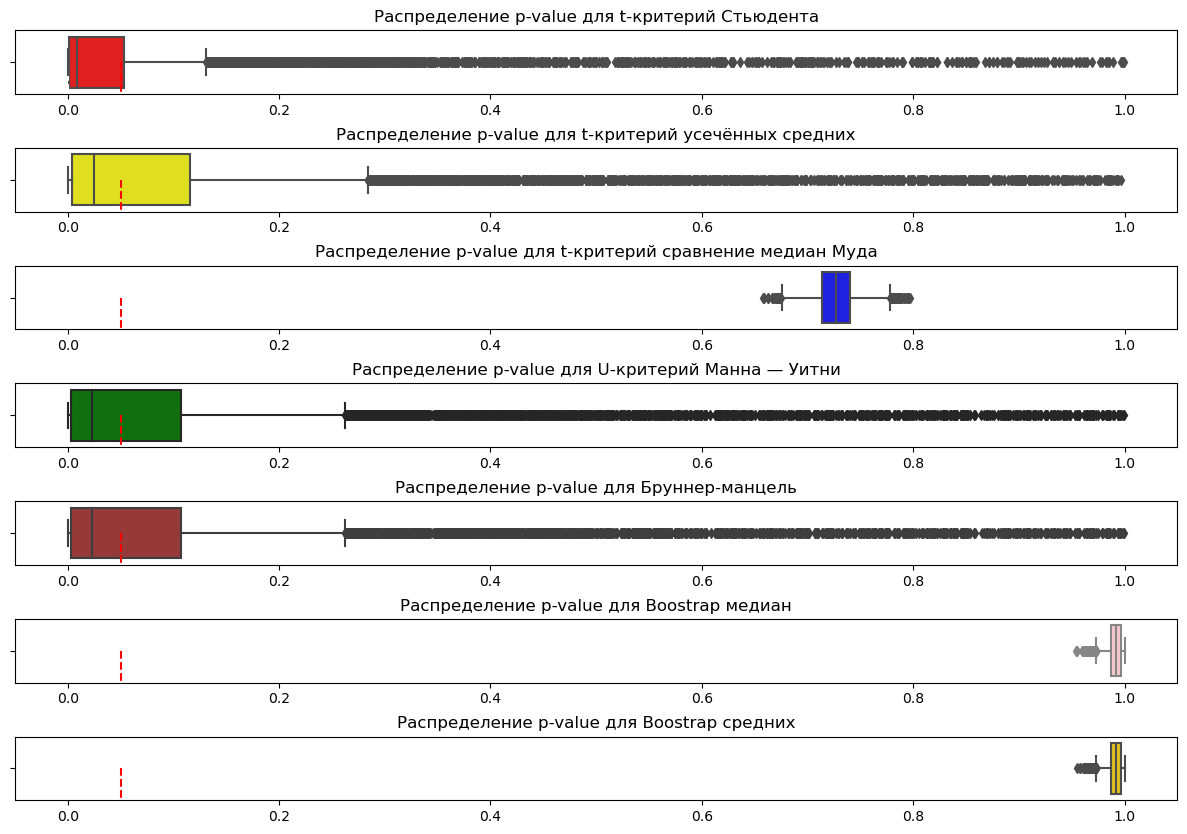

In [145]:
fig, axes = plt.subplots(nrows=7, sharex=False, sharey=True, figsize=(15, 10))
plt.subplots_adjust(hspace=0.85)
colors = ('red', 'yellow', 'blue', 'green', 'brown', 'pink', 'gold')
for method in enumerate([list_ttest, list_ttest_ind, list_median_test, list_mwu, list_bm, list_boostrap_median, list_boostrap_mean]):
    index = method[0]
    axes[index].vlines(x = 0.05,ymin=0,ymax=400,linestyle='--', color='red')
    axes[index].vlines(x = 0,ymin=0,ymax=400,linestyle='--', color='white')
    axes[index].vlines(x = 1,ymin=0,ymax=400,linestyle='--', color='white')
    sns.boxplot(x=method[1][1], ax=axes[method[0]], color=colors[index])
    axes[index].set_title(f'Распределение p-value для {method[1][0]}')

In [8]:
sns.boxplot(list_mwu_pvalues)

NameError: name 'list_mwu_pvalues' is not defined

## Биноминальное распределение

In [ ]:
pg.compute_bootci(exponential_1, exponential_2, func = lambda x, y: np.median(x) - np.median(y))

In [ ]:
r_color = 'SeaGreen'

fig, axs = plt.subplots(2, 1, figsize=(15, 10))

sns.boxplot(data=df_binomial, x='Group_1')
axs[0].set_title("Распределение биноминальное распределение 1ой группы", fontsize=15)

sns.boxplot(data=df_binomial, x='Group_2')
axs[1].set_title("Распределение биноминальное распределение 2ой группы", fontsize=15)

